In [1]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
insurance = pd.read_csv('insurance.csv')

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


W pierwszej kolejności sprawdzamy z jakich danych składa się nasza tabela. Tabela zawiera dane odnośnie wieku, płci, wartości BMI, ilości posiadanych dzieci, czy osoba pali czy nie, z jakiego regionu pochodzi oraz wartość, którą płaci na ubezpieczenie. Są to informacje często uzywane do wyliczania oplat na ubezpieczenie. 

In [7]:
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


Następnie sprawdzamy czy nasze dane są pełne, czy nie mamy błędnego zbioru danych lub zbioru danych z "dziurami" czyli niepełnego zbioru danych. 

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Sprawdzamy informacje na temat zbioru danych. Mozemy zauwazyć, ze w 3 kolumnach mamy wartości o typie object. Niestety ten typ nie podlega operacjom matematycznym, z uwagi na to nie będzie widoczny w dalszych badaniach korelacji ani wykresach. Mozemy natomiast podstawic inne odpowiadajace wartości za pomocą komendy apply(), ktore podlegają operacjom matematycznym. W dalszej części zadania zostaną podjęte te działania. Wiemy, ze mamy dwie kolumny w których dane mogą przybrać dwie wartości te kolumny to "smoker" oraz "sex". Dla tych kolumn wykonujemy podstawienie 0 i 1 w miejsce danych. 

In [9]:
def zamiensex(x):
    if x == 'male': return 1 
    if x == 'female': return 0

insurance.sex = insurance.sex.apply(zamiensex)
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
def zamiensmoker(x):
    if x == 'yes': return 1 
    if x == 'no': return 0

insurance.smoker = insurance.smoker.apply(zamiensmoker)
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

Odpowiednio zamieniliśmy dane, pozostała jedna kolumna do zmiany, sprawdzamy najpierw ile mozliwych wartosci wystepuje w tej kolumnie.

In [6]:
insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Wiemy, ze w kolumnie "region" dane moze przyjąć 4 wartości. Nie zadziała w takim przypadku podstawienie jakiego dokonaliśmy w powyzszych przypadkach. Dokonamy operacji dummy encoding. 

In [14]:
pd.get_dummies(insurance,dtype=int)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [15]:
insurance_dummies=pd.get_dummies(insurance,dtype=int)

In [16]:
insurance_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


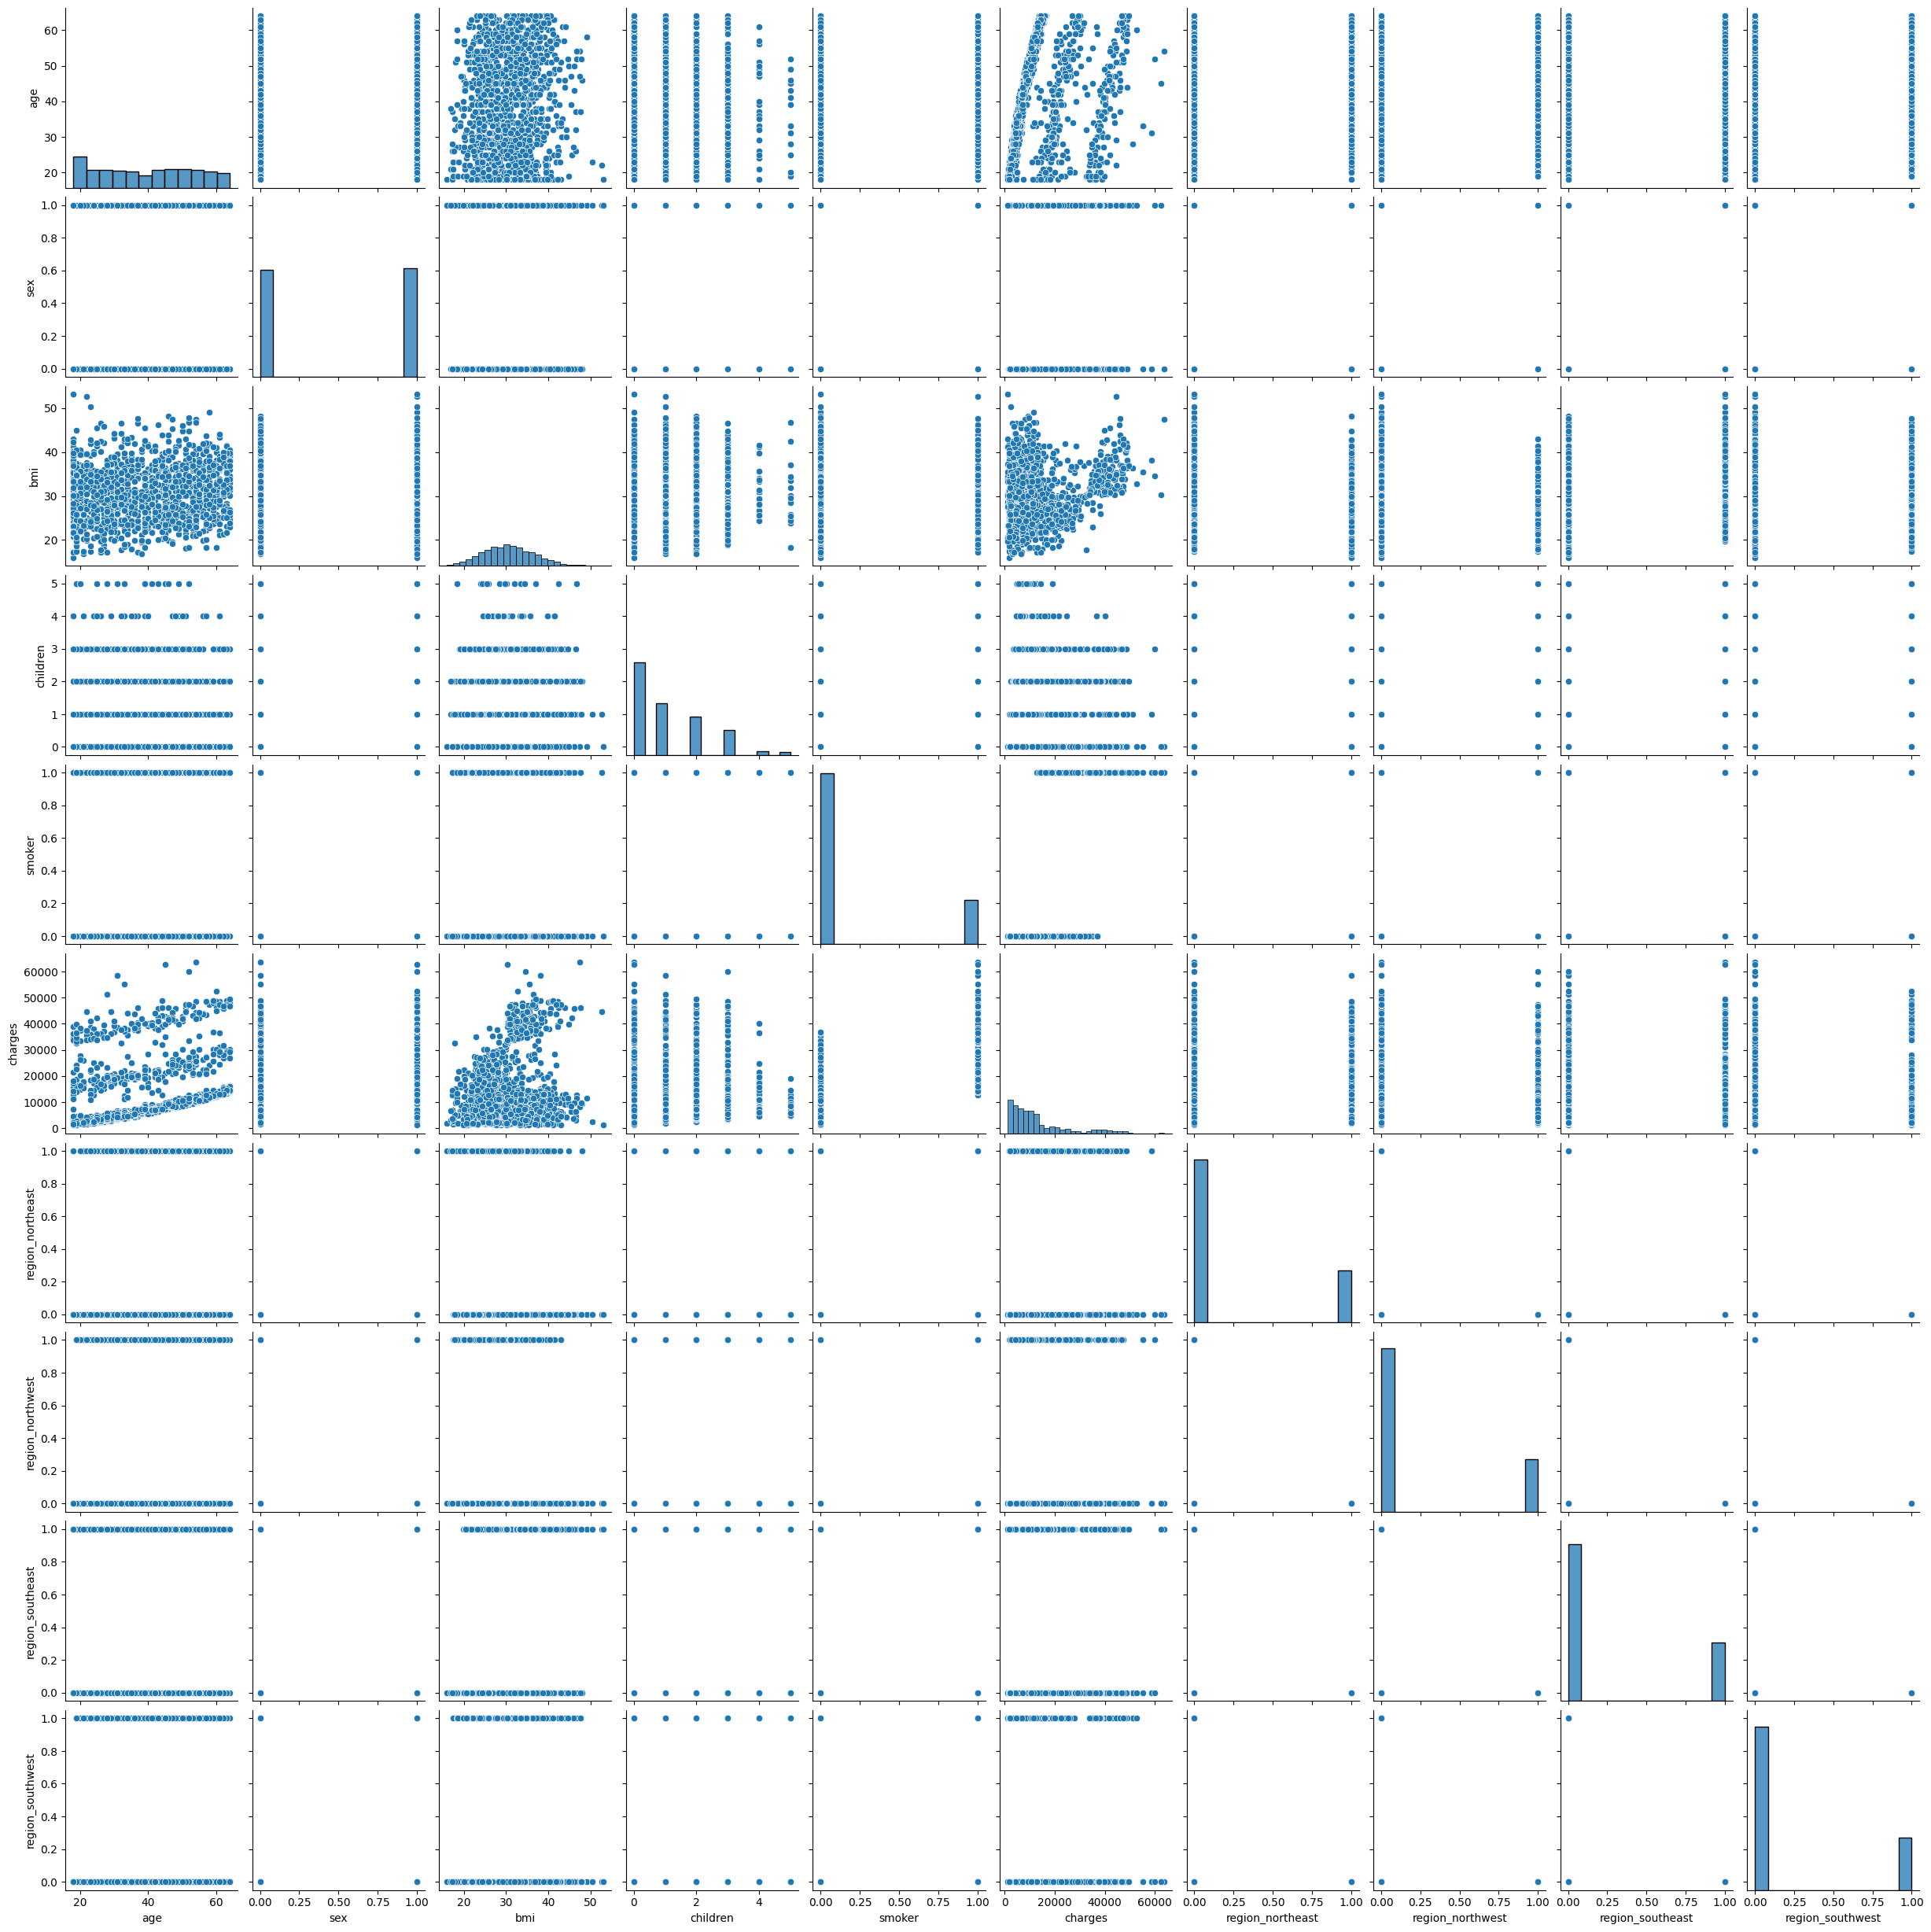

In [18]:
sns.pairplot(insurance_dummies)

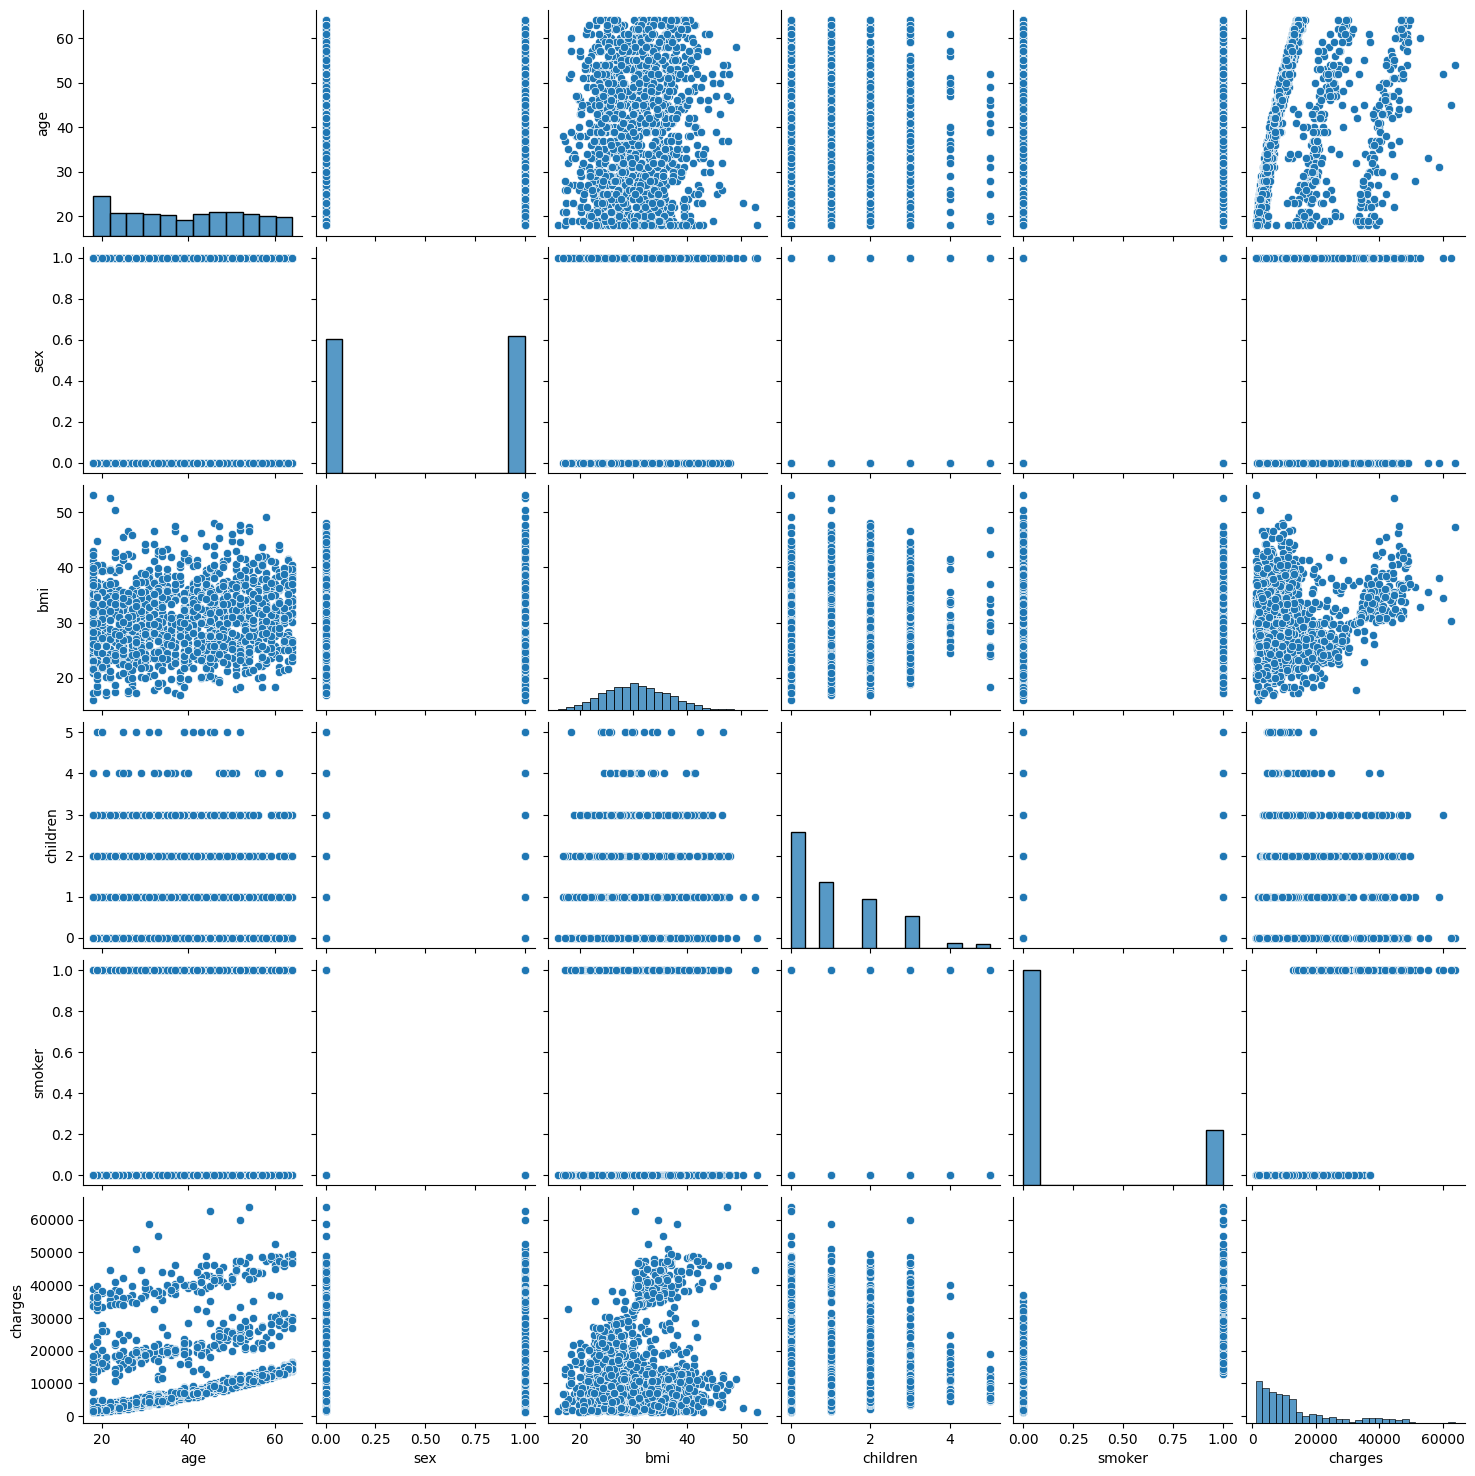

In [19]:
sns.pairplot(insurance)

Na podstawie powyzszych wykresów mozemy wyciagnąć pierwsze wnioski z naszego zbioru danych. 
1. W zbiorze danych występują osoby o 12 róznych wiekach. 
2. Mozemy zauwazyc, ze wykres skupiajacy się na BMI przyjmuje wygląd podobny do rozkładu normalnego
3. Mozemy zauwazyc, ze wraz ze wzrostem wieku zwykle zwiekszają się tez opłaty na ubezpieczenie
4. Korelacja pomiędzy ilością dzieci a wielkością opłat jest niewielka natomiast mozna zauwazyć, ze przy 4 lub 5 dzieciach opłaty są zwykle znacząco mniejsze.
5. Nie widać jasno wyrózniających sie korelacji miedzy danymi w przypadku: bmi i wieku, ilosci dzieci i wieku, bmi i ilosci dzieci, bmi i opłatami.
6. Mozna zauwazyć, ze palenie wpływa na wysokość opłat. 

/var/folders/_m/q76_r4cn20l64ztgb8qj_wvm0000gn/T/ipykernel_57863/2135298546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

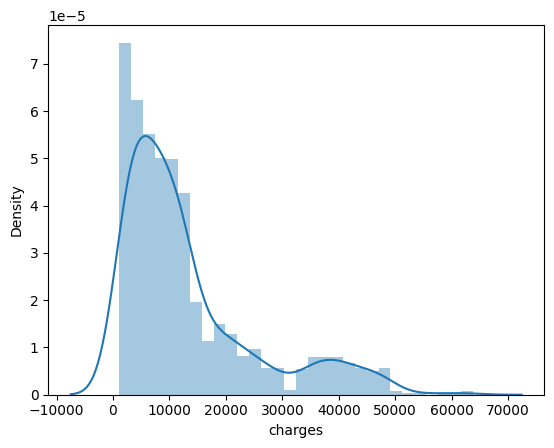

In [20]:
sns.distplot(insurance['charges'])

<Axes: >

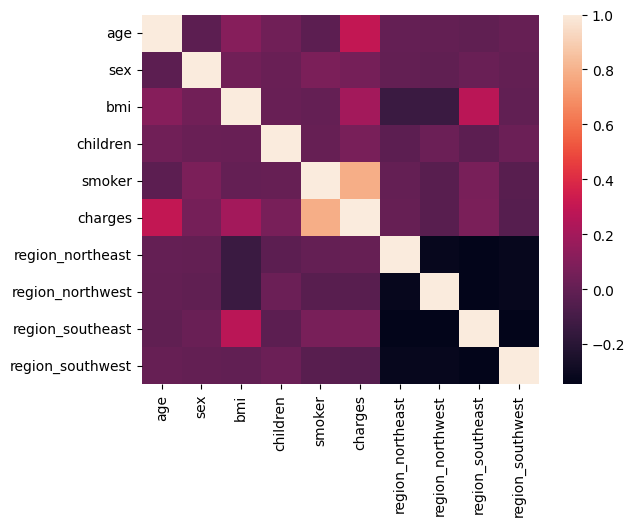

In [21]:
numeric_df = insurance_dummies.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

Sprawdzamy dodatkowo korelacje między danymi, które posiadamy w zbiorze. Oprócz jasnych i znanych korelacji, które znajdują się na diagonali, mamy 3 najmocniejsze korelacje. 
1. Najmocniejsza korelacja - między wysokością opłat (charges), a informacja czy osoba ubezpieczana pali. 
2. Druga najmocniejsza korelacja - między wysokością opłat, a wiekiem osoby ubezpieczanej. 
3. Trzecia najmocniejsza korelacja - między wysokością opłat, a BMI osoby ubezpieczanej.

Dodatkowo ciekawą informacją jest to, ze mozemy zauwazyć w miarę wysoką korelację między BMI a regionem "southeast".

In [22]:
X = insurance_dummies[['age', 'sex', 'bmi','children', 'smoker', 'region_southeast','region_southwest','region_northwest','region_northeast']]
y = insurance_dummies['charges']

In [23]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
print(lm.intercept_)

-12168.739482841618


In [28]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.736061
sex,-92.839037
bmi,326.217368
children,494.668132
smoker,23400.261918
region_southeast,-601.818588
region_southwest,-238.628660
region_northwest,512.714764
region_northeast,327.732485


Interpretacja: 
1. 1 jednostka więcej wieku odpowiada opłatom większym o (w przyblizeniu) 257 jednostek.
2. Męzczyzna średnio płaci o 92 jednostek mniej niz kobieta 
3. Wzrost o jedna jednostkę BMI łączy się ze wzrostem opłat o 326 jednostek 
4. Wzrost ilości dzieci o jedno wziąze się średnio z przyrostem opłat o 494 jednostek 
5. Średnia róznica między opłatami wnoszonymi przez niepalących a palaczy wynosi 23 400 jednostek. 
6. Odnośnie regionów, okazuje się, ze średnio w regionie southwest płaci się o 601 jednostek mniej, w southwest o 238 jednostek mniej. Natomiast w regionach północnych płaci się: w northwest o 512 więcej, northeast o 327 jednostek więcej.



In [29]:
predictions = lm.predict(X_test)

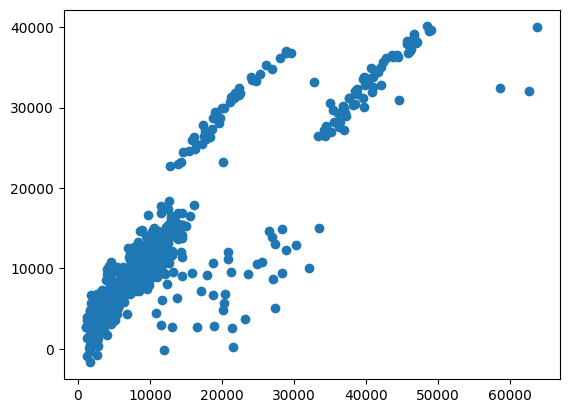

In [30]:
plt.scatter(y_test,predictions)

Mozemy zauwazyc, ze nasz model nie jest idealny, z powyzszego wykresy widzimy, ze punkty nie ukladaja sie jasno w jedna linię.

/var/folders/_m/q76_r4cn20l64ztgb8qj_wvm0000gn/T/ipykernel_57863/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


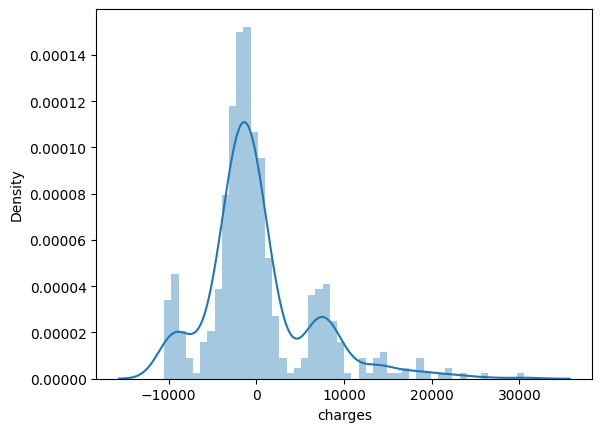

In [31]:
sns.distplot((y_test-predictions),bins=50);

Wykres pokazuje róznice między predykcją opłat, a rzeczywistą ceną. Mimo tego, ze częściowo wygląda wykres jak wykres rozkładu normalnego nie jest nim w pełni. Mamy więcej błędów policzenia za duzo opłat niz za mało.

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4185.64503430342
MSE: 36732423.4714728
RMSE: 6060.72796547352


Opiszemy RMSE jako najbardziej popularna metodę walidacji modelu, z wyniku RMSE wynika, ze nasz model myli się średnio o 6060 jednostek. 

In [35]:
import statsmodels.api as sn

In [36]:
model = sn.OLS(y_train, X_train)

In [37]:
results = model.fit()

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     283.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.66e-226
Time:                        19:46:53   Log-Likelihood:                -8120.6
No. Observations:                 802   AIC:                         1.626e+04
Df Residuals:                     793   BIC:                         1.630e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                257.7361     15.334  

O naszy modelu mozemy powiedzieć, ze: 
1. Mamy średnie R-kwadrat, wynosi ono 0.741, czyli nasz model nie jest dobrze dopasowany.
2. Zmienna "sex" jest mało istotna statystycznie ze względu na wysoki wynik P (0.830). Reszta zmiennych jest istotna statystycznie
3. Test Durbina-Watsona, mówi nam, ze w modelu mamy pozytywną autokorelację.
4. Coefficiency zostało zinterpretowane wyzej w pracy domowej.